## Notebook 4 : Trends and forecasts of property values 

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


this notebook will help identifying the past trends and foresee the evolution of the property values. We will base this analysis on historical data. Retrospective analysis : How did the prices evolve throughout time ? Can we target global  and seasonal trends ? What would be the prices in 3, 5 or 10 years ? Those insights can be more robust by linking them to geographical comparisons.

Nous allons nous poser différentes questions pour mieux saisir le contexte :
- Comment les valeurs foncières ont-elles évolué de 2019 à 2024 ?
- Quelle régions ou types de biens ont montré une croissance ou un déclin ?
- existe-t-il des périodes de pics dans les transactions ?
- Peut-on prédire les tendance futures des valeurs foncières ?


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [34]:
# Read in the data
df_tf = pd.read_csv('df_complete.csv', low_memory=False)
df_tf.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [35]:
df_clean = df_tf[
    (df_tf['Valeur fonciere'] > 0) & 
    (
        (df_tf['Surface reelle bati'] > 0) & (df_tf['Nombre pieces principales'] > 0) |
        (df_tf['Type local'].isin(['Maison','Appartement','Local industriel. commercial ou assimilé','Dépendance']))
    )
]

drop_columns=['Voie', 'Code commune', 'Code type local','Nombre de lots']
df_clean=df_clean.drop(columns=drop_columns, errors='ignore')



In [36]:
#### CONVERTS TO THE RIGHT TYPE ####
category_convert = ['Nature mutation', 'Code postal', 'Commune', 'Code departement', 'Type local']
df_clean[category_convert] = df_clean[category_convert].astype('category')

df_clean['Date mutation'] = pd.to_datetime(df_clean['Date mutation'], errors = 'coerce')
df_clean['Date mutation'] = df_clean['Date mutation'].interpolate(method='linear')

df_clean['Valeur fonciere']=df_clean['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_clean['Valeur fonciere']=pd.to_numeric(df_clean['Valeur fonciere'], errors='coerce')
df_clean['Mois'] = df_clean['Date mutation'].dt.month
df_clean['Annee'] = df_clean['Date mutation'].dt.year
df_clean['Jour'] = df_clean['Date mutation'].dt.day

df_clean.info()
#print(df_clean[['Date mutation', 'Mois', 'Annee']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 10095242 entries, 0 to 17810874
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Code postal                category      
 4   Commune                    category      
 5   Code departement           category      
 6   Type local                 category      
 7   Surface reelle bati        float64       
 8   Nombre pieces principales  float64       
 9   Surface terrain            float64       
 10  annee                      int64         
 11  Mois                       int32         
 12  Annee                      int32         
 13  Jour                       int32         
dtypes: category(5), datetime64[ns](1), float64(4), int32(3), int64(1)
memory usage: 723.5 MB


In [37]:
missing_values = df_clean.isnull().sum()
(df_clean == 0).sum()


Date mutation                      0
Nature mutation                    0
Valeur fonciere                    0
Code postal                      495
Commune                            0
Code departement                   0
Type local                         0
Surface reelle bati          3345780
Nombre pieces principales    3914868
Surface terrain              4804291
annee                              0
Mois                               0
Annee                              0
Jour                               0
dtype: int64

In [38]:
#### CHECK DUPLICATES ####
df_clean.drop_duplicates(keep='last', inplace=True)
df_clean.duplicated().sum()

0

In [39]:
df_clean.head(30)

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Commune,Code departement,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Mois,Annee,Jour
0,2019-01-07,Vente,244200.0,1000.0,BOURG-EN-BRESSE,1,Maison,150.0,5.0,695.0,2019,1,2019,7
1,2019-04-07,Vente,195000.0,1250.0,HAUTECOURT-ROMANECHE,1,Maison,94.0,4.0,888.0,2019,4,2019,7
2,2019-04-07,Vente,195000.0,1250.0,HAUTECOURT-ROMANECHE,1,Maison,94.0,4.0,500.0,2019,4,2019,7
3,2019-04-07,Vente,110030.0,1250.0,GRAND-CORENT,1,Maison,90.0,3.0,522.0,2019,4,2019,7
5,2019-03-07,Vente,160450.0,1270.0,COLIGNY,1,Maison,110.0,5.0,2483.0,2019,3,2019,7
6,2019-03-07,Vente,160450.0,1270.0,COLIGNY,1,Maison,110.0,5.0,557.0,2019,3,2019,7
8,2019-01-07,Vente,211500.0,1440.0,VIRIAT,1,Maison,108.0,4.0,1159.0,2019,1,2019,7
9,2019-02-07,Vente,180000.0,1000.0,BOURG-EN-BRESSE,1,Maison,97.0,5.0,314.0,2019,2,2019,7
10,2019-02-07,Vente,216600.0,1000.0,BOURG-EN-BRESSE,1,Dépendance,0.0,0.0,1206.0,2019,2,2019,7
11,2019-02-07,Vente,216600.0,1000.0,BOURG-EN-BRESSE,1,Appartement,25.0,1.0,1206.0,2019,2,2019,7


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze the evolution of property values over time (by year).
- Identify significant periods of increase or decrease in prices.

In [40]:
print(df_clean.describe(include='all'))
print(df_clean[['Valeur fonciere', 'Surface reelle bati', 'Surface terrain']].describe())

                        Date mutation Nature mutation  Valeur fonciere  \
count                         9971154         9971154     9.971154e+06   
unique                            NaN               6              NaN   
top                               NaN           Vente              NaN   
freq                              NaN         9654128              NaN   
mean    2021-12-21 04:41:47.844137472             NaN     7.503084e+05   
min               2019-01-07 00:00:00             NaN     1.500000e-01   
25%               2020-11-05 00:00:00             NaN     1.100000e+05   
50%               2022-01-02 00:00:00             NaN     1.872000e+05   
75%               2023-02-28 14:24:00             NaN     3.150000e+05   
max               2024-12-06 00:00:00             NaN     1.415000e+10   
std                               NaN             NaN     1.213309e+07   

        Code postal   Commune Code departement Type local  \
count     9971154.0   9971154          9971154    

In [41]:
high_values = df_clean[df_clean['Valeur fonciere'] > 1e6]
high_value_properties_sorted = high_values.sort_values('Valeur fonciere', ascending=False)


### Outliers ###

In [42]:
Q1 = df_clean['Valeur fonciere'].quantile(0.25)
Q3 = df_clean['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['Valeur fonciere'] < lower_bound) | 
                    (df_clean['Valeur fonciere'] > upper_bound)]
print(outliers)


                         Date mutation Nature mutation  Valeur fonciere  \
117      2019-03-07 00:00:00.000000000           Vente        3000000.0   
1059     2019-05-22 21:49:05.454545408           Vente         625000.0   
1061     2019-04-14 08:43:38.181818112           Vente         625000.0   
1813     2019-08-14 08:43:38.181818112           Vente         644100.0   
1814     2019-07-31 10:54:32.727272704           Vente         644100.0   
...                                ...             ...              ...   
17810849 2024-07-15 00:00:00.000000000           Vente        1700000.0   
17810856 2024-10-23 20:00:00.000000000           Vente         900000.0   
17810857 2024-10-03 18:00:00.000000000           Vente         900000.0   
17810871 2024-09-04 00:00:00.000000000           Vente         833000.0   
17810872 2024-09-04 00:00:00.000000000           Vente         833000.0   

         Code postal          Commune Code departement  \
117           1000.0  BOURG-EN-BRESSE    

#### Stock des valeurs outliers ####

D'autre part, nous créeons un Data Frame qui exclut les outliers, un autre Data Frame qui inclut les outliers seulement.

In [43]:
median_value = df_clean['Valeur fonciere'].median()
df_wo_outliers= df_clean.copy()
df_wo_outliers.loc[df_clean['Valeur fonciere'] > upper_bound, 'Valeur fonciere'] = median_value
outlier_data = df_clean[(df_clean['Valeur fonciere'] > upper_bound) |
                        (df_clean['Valeur fonciere'] < lower_bound)]


# Exploration des données (EDA) # 

### Analyse descriptive ###

In [44]:
# Statistiques descriptives des colonnes temporelles
df_clean[['Mois', 'Annee', 'Jour']].describe()
df_clean['Annee-Mois'] = df_clean['Date mutation'].dt.to_period('M')

# Nombre d'observations par mois et par année pour observer les tendances
observations_par_mois = df_clean['Annee-Mois'].value_counts().sort_index()
observations_par_annee = df_clean['Annee'].value_counts().sort_index()

#print(observations_par_mois)
print(observations_par_annee)

Annee
2019     951016
2020    1716745
2021    2310174
2022    2289702
2023    1987639
2024     715878
Name: count, dtype: int64


Lorsque l'on observe l'évolution des transaction par mois et par année de 2019 à 2024, nous constatons un pattern où le nombre de transactions augmentent jusqu'à un certain pic, entre le début d'année et la période estivale. Par la suite, elle baisse jusqu'en fin d'année. Peu importe le type de local, toutes les transactions suivent la même tendance en fonction du temps. Le nombre de transactions concernant les locaux industriels et commerciaux sont cependant moindres.

In [103]:
mutations_analyse=df_clean.copy()
mutations_analyse['Date mutation'] = pd.to_datetime(mutations_analyse['Date mutation'])
mutations_analyse['Annee'] = mutations_analyse['Date mutation'].dt.year
mutations_analyse['Annee-Mois'] = mutations_analyse['Date mutation'].dt.to_period('M').astype(str)

def plot_interactive(annee_range, type_bien=None, show_median=True, show_mean=True):
    # Filtrer les données par plage d'années
    filtered_data = mutations_analyse[
        (mutations_analyse['Annee'] >= annee_range[0]) & 
        (mutations_analyse['Annee'] <= annee_range[1])
    ]
    
    if type_bien: 
        filtered_data = filtered_data[filtered_data['Type local'] == type_bien]
    
    sequences = (
        filtered_data.groupby(['Annee-Mois', 'Type local'],observed=False)
        .size()
        .reset_index(name='count')
    )
    
    prix_moyens = (
        filtered_data.groupby(['Annee-Mois', 'Type local'],observed=False)['Valeur fonciere']
        .mean()
        .reset_index(name='mean_price')
    )

    prix_medians= (
        filtered_data.groupby(['Annee-Mois', 'Type local'],observed=False)['Valeur fonciere']
        .median()
        .reset_index(name='median_price')
    )

    plt.figure(figsize=(20, 6))
    sns.lineplot(
        data=sequences,
        x='Annee-Mois', y='count',
        hue='Type local', marker='o', palette='Set2'
    )
    plt.title('Évolution des transactions par Mois et Année')
    plt.xlabel('Temps (Année-Mois)')
    plt.ylabel('Nombre de Transactions')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='Type de Bien')
    plt.show()

annee_widget = widgets.IntRangeSlider(
    value=[2021, 2023],
    min=2019, max=2024, step=1,
    description='Années :',
    continuous_update=False
)

type_bien_widget = widgets.Dropdown(
    options=[None] + list(mutations_analyse['Type local'].unique()),
    value=None,
    description="Type de Bien :"
)

interact(
    plot_interactive, 
    annee_range=annee_widget, 
    type_bien=type_bien_widget,
    show_median=widgets.Checkbox(value=True, description="Afficher Médiane"),
    show_mean=widgets.Checkbox(value=False, description="Afficher Moyenne")
)


interactive(children=(IntRangeSlider(value=(2021, 2023), continuous_update=False, description='Années :', max=…

<function __main__.plot_interactive(annee_range, type_bien=None, show_median=True, show_mean=True)>

### 1. Comment les valeurs foncières ont-elles évolué de 2019 à 2024 ? ###

Pour analyser cette question, nous allons examiner comment les moyennes et les médianes des valeurs foncières ont changé annuellement et mensuellement pendant cette période.

#### 1.1 Évolution annuelle et mensuelle des valeurs foncières ####

Cette première analyse nous permettra d'examiner l'évolution des valeurs foncières annuelles en termes de moyenne et de médiane. Il s'agit de comprendre les tendances générales et l'évolution du marché immobilier dans cette période.

Nous avons ci-dessous un graphique qui trace l'evolution globale de la médiane et la moyenne des valeurs foncières de 2019 à 2024. 

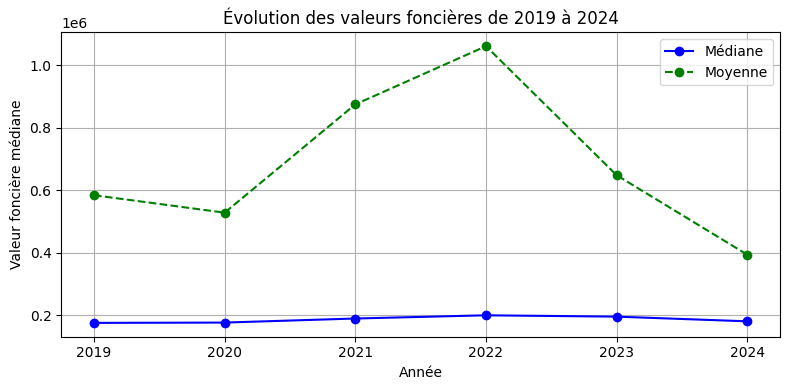

In [45]:
# Calcul de la médiane et de la moyenne par année
median_peryear = df_clean.groupby('Annee')['Valeur fonciere'].median().reset_index()
mean_peryear = df_clean.groupby('Annee')['Valeur fonciere'].mean().reset_index()
def plot_evolution_valeurs():
    plt.figure(figsize=(8, 4))
    plt.plot(median_peryear['Annee'], median_peryear['Valeur fonciere'], marker='o', label='Médiane', color='blue')
    plt.plot(mean_peryear['Annee'], mean_peryear['Valeur fonciere'], marker='o', label='Moyenne', color='green', linestyle='--')

    plt.title('Évolution des valeurs foncières de 2019 à 2024')
    plt.xlabel('Année')
    plt.ylabel('Valeur foncière médiane')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_evolution_valeurs()

La médiane est la valeur centrale dans une distribution. 50% des valeurs sont en dessous et 50% sont au-dessus. Cela la rend moins sensibles aux outliers (valeurs extrêmes). En revanche, la moyenne est plus influencée par les valeurs extrêmes ou abberantes. 

Nous observons une stagnation de la médiane de la valeur foncière entre 2021 et 2023, ce qui suggère que la majorité des transactions ont maintenu des prix relativement constants sur cette période. 

Cependant, on observe une augmentation de la moyenne à partir de 2020 jusqu'à atteindre un pic significatif en 2022, suggérant qu'il y a eu des transactions exceptionnelles cette année-là, avec des propriétés de haute valeur vendues à des prix bien supérieures à la moyenne. Ce phénomène pourrait être le résultat de quelques ventes immobilières de luxe ou dans des quartiers spécifiques, mais aussi des raisons économiques et politiques, notamment le COVID-19 apparu fin 2020, ce qui a pu influencé des personnes à acheter.



##### Statistiques #####

L'interprétation des statistiques des prix fonciers permet d'obtenir des insights sur l'évolution du marché de l'immobilier. Ci-dessous est affiché un tableau présentant la moyenne (mean), la médiane (median) et l'écart-type (std) pour chaque année étudiée.



In [46]:
annual_stats = df_clean.groupby('Annee')['Valeur fonciere'].agg(['mean', 'median', 'std']).reset_index()
annual_stats


,Annee,mean,median,std
0,2019,5.838922e+05,175000.0,6.189455e+06
1,2020,5.279502e+05,176000.0,5.667329e+06
2,2021,8.746659e+05,189000.0,1.891471e+07
3,2022,1.061206e+06,199283.5,1.456868e+07
4,2023,6.478869e+05,195000.0,5.430522e+06
5,2024,3.932982e+05,180000.0,2.567656e+06


#### Zoom sur les prix moyens des transactions foncières par année ####

- 2019 : 583 892 €
- 2020 : 527 950 € (- 55 942 € soit -9,58%)
- 2021 : 874 665 € (+ 346 715 € soit +65,65%)
- 2022 : 1 061 206 € (+ 186 541 € soit +21,33%)
- 2023 : 647 887 € (- 413 319 € soit -38,95%)
- 2024 : 393 298 € (- 254 589 € -39,31%)

En 2021, la moyenne des valeurs foncières augmente fortement (+65,65%) par rapport à 2020. Cela peut être lié à une reprise économique post-Covid et à une  demande significative sur le marché immobilier notamment avec le télétravail.

Ci-dessous, nous montrons la différence entre la médiane et la moyenne chaque année. Nous pouvons observer clairement que les outliers ont un impact considérable dans la valeur foncière par année.

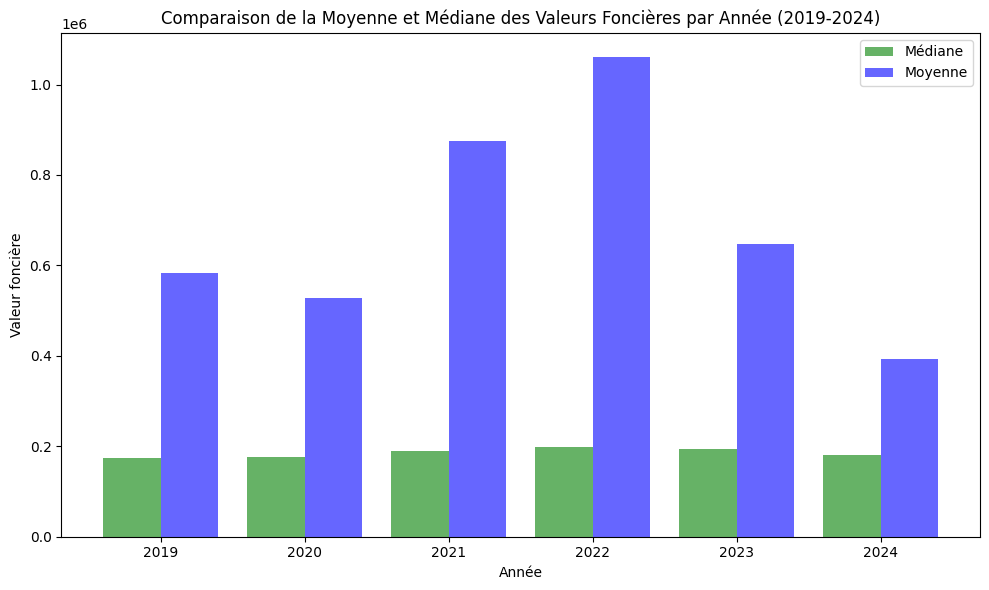

In [48]:
def plot_comparaison_moyenne_médiane():
    plt.figure(figsize=(10, 6))
    # Placer la médiane et la moyenne côte à côte
    x = mean_peryear['Annee']
    offset = 0.2 
    plt.bar(x - offset, median_peryear['Valeur fonciere'], width=offset * 2, label='Médiane', color='green', alpha=0.6)
    plt.bar(x + offset, mean_peryear['Valeur fonciere'], width=offset * 2, label='Moyenne', color='blue', alpha=0.6)
    plt.title('Comparaison de la Moyenne et Médiane des Valeurs Foncières par Année (2019-2024)')
    plt.xlabel('Année')
    plt.ylabel('Valeur foncière')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_comparaison_moyenne_médiane()


Nous avons décidé d'afficher l'évolution des valeurs foncières par mois pour chaque année, de 2019 à 2024, indépendamment des types de local.

In [100]:
def plot_interactive(annee_range, show_median=True, show_mean=True):
    # Filtrer les données par plage d'années et de mois
    filtered_data = mutations_analyse[
        (mutations_analyse['Annee'] >= annee_range[0]) & 
        (mutations_analyse['Annee'] <= annee_range[1])
    ]    
    
    # Calcul des moyennes et des médianes pour la période et le type de bien filtrés
    prix_moyens = (
        filtered_data.groupby(['Annee-Mois'])['Valeur fonciere']
        .mean()
        .reset_index(name='mean_price')
    )
    
    prix_medians = (
        filtered_data.groupby(['Annee-Mois'])['Valeur fonciere']
        .median()
        .reset_index(name='median_price')
    )

    # Graphique de la moyenne et de la médiane
    plt.figure(figsize=(20, 6))
    
    if show_mean:
        sns.lineplot(
            data=prix_moyens,
            x='Annee-Mois', y='mean_price',
            label='Moyenne', marker='o', color='blue'
        )
        
    if show_median:
        sns.lineplot(
            data=prix_medians,
            x='Annee-Mois', y='median_price',
            label='Médiane', marker='o', color='orange'
        )
    
    plt.title('Évolution des Prix par Mois et Année')
    plt.xlabel('Temps (Année-Mois)')
    plt.ylabel('Prix (€)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Statistiques')
    plt.show()

annee_widget = widgets.IntRangeSlider(
    value=[2019, 2023],
    min=2019, max=2024, step=1,
    description='Années :',
    continuous_update=False
)

interact(
    plot_interactive, 
    annee_range=annee_widget, 
    show_median=widgets.Checkbox(value=True, description="Afficher Médiane"),
    show_mean=widgets.Checkbox(value=True, description="Afficher Moyenne")
)

interactive(children=(IntRangeSlider(value=(2019, 2023), continuous_update=False, description='Années :', max=…

<function __main__.plot_interactive(annee_range, show_median=True, show_mean=True)>

In [101]:
def plot_interactive(annee_range, type_bien='Maison', show_median=True, show_mean=True):
    filtered_data = mutations_analyse[
        (mutations_analyse['Annee'] >= annee_range[0]) & 
        (mutations_analyse['Annee'] <= annee_range[1])
    ]
    
    if type_bien: 
        filtered_data = filtered_data[filtered_data['Type local'] == type_bien]
    
    sequences = (
        filtered_data.groupby(['Annee-Mois', 'Type local'],observed=False)
        .size()
        .reset_index(name='count')
    )
    
    prix_moyens = (
        filtered_data.groupby(['Annee-Mois', 'Type local'],observed=False)['Valeur fonciere']
        .mean()
        .reset_index(name='mean_price')
    )

    prix_medians= (
        filtered_data.groupby(['Annee-Mois', 'Type local'],observed=False)['Valeur fonciere']
        .median()
        .reset_index(name='median_price')
    )

    plt.figure(figsize=(20, 6))
    if show_mean:
        sns.lineplot(
        data=prix_moyens,
        x='Annee-Mois', y='mean_price',
        hue='Type local', marker='o', palette='viridis'
    )
        
    if show_median:
        sns.lineplot(
        data=prix_medians,
        x='Annee-Mois', y='median_price',
        hue='Type local', marker='o', palette='Set2'
    )
    
    plt.title('Évolution des Prix par Mois et Année')
    plt.xlabel('Temps (Année-Mois)')
    plt.ylabel('Prix (€)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

annee_widget = widgets.IntRangeSlider(
    value=[2021, 2023],
    min=2019, max=2024, step=1,
    description='Années :',
    continuous_update=False
)

type_bien_widget = widgets.Dropdown(
    options=list(mutations_analyse['Type local'].unique()),
    value=None,
    description="Type de Bien :"
)

interact(
    plot_interactive, 
    annee_range=annee_widget, 
    type_bien=type_bien_widget,
    show_median=widgets.Checkbox(value=True, description="Afficher Médiane"),
    show_mean=widgets.Checkbox(value=False, description="Afficher Moyenne")
)


interactive(children=(IntRangeSlider(value=(2021, 2023), continuous_update=False, description='Années :', max=…

<function __main__.plot_interactive(annee_range, type_bien='Maison', show_median=True, show_mean=True)>

In [54]:
from statsmodels.tsa.seasonal import STL

# Exemple de décomposition avec STL
data = df_clean.groupby('Date mutation')['Valeur fonciere'].median()
stl = STL(data, seasonal=13)
result = stl.fit()
result.plot()
plt.show()


ValueError: Unable to determine period from endog

## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Time series graphs showing property value trends over the years.
- Line charts comparing trends across different regions.

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Synthesize observed price trends over the past years.
- Identify external factors that could explain changes (e.g., economy, demographics, infrastructure).

Recommendations:
- Propose investment recommendations based on future price forecasts (e.g., investing in regions with predicted price growth).
- Risk management advice based on past and future property value trends.